# Wikiann Results

In [35]:
import os
import numpy as np
import json
import pandas as pd
dir = '/home/s6amalia/multi_run'
dataset_name = 'wikiann'
directory = os.fsencode(f'{dir}/{dataset_name}')

def open_json_files(directory):
    all_data={}
   # dir = '/home/s6amalia/models'
    for fol in os.listdir(directory):
        fol_data=[]
        folname = os.fsdecode(fol)
        # print(filename)
        model_name = folname[:-(len(dataset_name)+1)]
        index= 0
        # print(model_name)
        for file in os.listdir(f'{dir}/{dataset_name}/{folname}'):
            index = index+1
            file_data=[]
            if file.endswith('.json'):
                with open(f'{dir}/{dataset_name}/{folname}/{file}', 'r') as f:
                    res = json.load(f)
                
                for lang, accuracy in res.items():
                    # Append data as a dictionary to the list
                    
                    file_data.append({'Model': model_name,
                                     'Language': lang,
                                     'Clean F1': np.round(accuracy['clean_f1'],2),
                                     'Noisy F1':  np.round(accuracy['noisy_f1'],2)})
                fol_data.append(file_data)
        all_data[model_name] = fol_data
            
    return all_data
                            
                    

# Call the function with the path to your directory
all_data = open_json_files(directory)
a_results = []
for model in all_data.items():
    res1 = pd.DataFrame(all_data[model[0]][0])
    res2 = pd.DataFrame(all_data[model[0]][1])
    res2 = res2.rename(columns={'Clean F1': 'Clean F1_2', 'Noisy F1': 'Noisy F1_2'})


    df_merged = pd.merge(res1, res2, on=['Model', 'Language'])
    a_results.append(df_merged)
    
# print(a_results)
res_wikiann = pd.concat(a_results)
res_wikiann

,Model,Language,Clean F1,Noisy F1,Clean F1_2,Noisy F1_2
0,mbert,en,84.78,80.21,84.67,79.87
1,mbert,de,89.65,86.16,89.73,86.12
2,mbert,es,92.21,88.27,92.40,88.57
3,mbert,fr,91.22,86.92,91.37,87.19
4,mbert,tr,92.67,89.50,92.66,89.72
0,xlmr,en,82.84,79.05,82.58,79.18
1,xlmr,de,86.59,83.81,87.14,84.03
2,xlmr,es,90.54,87.49,90.61,87.14
3,xlmr,fr,88.99,84.93,89.27,85.24
4,xlmr,tr,91.38,88.28,91.55,88.40


# All Results over 3 runs

In [4]:
import json
import os
import numpy as np
import pandas as pd

dir = '/home/s6amalia/models'

def first_res(dataset_name):
    data = []
    directory = os.fsencode(f'{dir}/{dataset_name}')
    # /home/s6amalia/models/snips/bloom7b-snips/inference_results_bloom7b.json
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        # print(filename)
        model_name = filename[:-(len(dataset_name)+1)]
        # print(model_name)
        try:
            with open(f'{dir}/{dataset_name}/{filename}/inference_results_{model_name}.json', 'r') as f:
                res = json.load(f)
            for lang, accuracy in res.items():
                    # Append data as a dictionary to the list
                if dataset_name == 'wikiann':
                    data.append({'Model': model_name,
                                 'Language': lang,
                                 'Clean F1': np.round(accuracy['clean_f1'],2),
                                 'Noisy F1':  np.round(accuracy['noisy_f1'],2)})
                else:
                    data.append({'Model': model_name, 
                                 'Language': lang, 
                                 'Clean Accuracy': np.round(accuracy['clean_accuracy'],2), 
                                 'Noisy Accuracy':  np.round(accuracy['noisy_accuracy'],2)})
        except: pass
    df = pd.DataFrame(data)
    return df

# df_xnli = first_res('xnli')
df_wikiann = first_res('wikiann')
df_wikiann = df_wikiann.rename(columns={'Clean F1': 'Clean F1_3', 'Noisy F1': 'Noisy F1_3'})
df_wikiann = pd.merge(res_wikiann, df_wikiann, on=['Model', 'Language'] )

df_wikiann = df_wikiann.rename(columns={'Clean F1': 'Clean F1_1', 'Noisy F1': 'Noisy F1_1'})
df_wikiann['C-N_1'] = df_wikiann['Clean F1_1'] - df_wikiann['Noisy F1_1']
df_wikiann['C-N_2'] = df_wikiann['Clean F1_2'] - df_wikiann['Noisy F1_2']
df_wikiann['C-N_3'] = df_wikiann['Clean F1_3'] - df_wikiann['Noisy F1_3']
df_wikiann['Avg Clean'] =  np.round((df_wikiann['Clean F1_1'] + df_wikiann['Clean F1_2'] + df_wikiann['Clean F1_3'])/3,2)
df_wikiann['Avg Noisy'] =  np.round((df_wikiann['Noisy F1_1'] + df_wikiann['Noisy F1_2'] + df_wikiann['Noisy F1_3'])/3,2)

df_wikiann['Avg C-N'] =  np.round((df_wikiann['C-N_1'] + df_wikiann['C-N_2'] + df_wikiann['C-N_3'])/3,2)
df_wikiann['StdDev'] = np.round(df_wikiann[['C-N_1', 'C-N_2', 'C-N_3']].std(axis=1),2)
df_wikiann['Relative Gap'] = np.round(100*(df_wikiann['Avg C-N']/df_wikiann['Avg Clean']),2)
df_wikiann



preferred_order = ['mbert','xlmr','mt5-300M','mt5-580M','mt5-1B','mt5-3B','bloom7b', 'falcon7b' ,'mt5-13B']

# Convert the 'Model' column to a categorical type with the preferred order
df_wikiann['Model'] = pd.Categorical(df_wikiann['Model'], categories=preferred_order, ordered=True)

# Sort the DataFrame by the 'Model' column
df_wikiann = df_wikiann.sort_values('Model').reset_index(drop=True)

df_wikiann

,Model,Language,Clean F1_1,Noisy F1_1,Clean F1_2,Noisy F1_2,Clean F1_3,Noisy F1_3,C-N_1,C-N_2,C-N_3,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,en,84.78,80.21,84.67,79.87,82.91,78.08,4.57,4.80,4.83,84.12,79.39,4.73,0.14,5.62
1,mbert,de,89.65,86.16,89.73,86.12,87.56,83.34,3.49,3.61,4.22,88.98,85.21,3.77,0.39,4.24
2,mbert,es,92.21,88.27,92.40,88.57,91.03,86.64,3.94,3.83,4.39,91.88,87.83,4.05,0.30,4.41
3,mbert,fr,91.22,86.92,91.37,87.19,89.57,85.31,4.30,4.18,4.26,90.72,86.47,4.25,0.06,4.68
4,mbert,tr,92.67,89.50,92.66,89.72,91.44,87.95,3.17,2.94,3.49,92.26,89.06,3.20,0.28,3.47
5,xlmr,en,82.84,79.05,82.58,79.18,81.54,77.88,3.79,3.40,3.66,82.32,78.70,3.62,0.20,4.40
6,xlmr,de,86.59,83.81,87.14,84.03,85.49,82.69,2.78,3.11,2.80,86.41,83.51,2.90,0.19,3.36
7,xlmr,es,90.54,87.49,90.61,87.14,89.73,86.48,3.05,3.47,3.25,90.29,87.04,3.26,0.21,3.61
8,xlmr,fr,88.99,84.93,89.27,85.24,88.31,84.45,4.06,4.03,3.86,88.86,84.87,3.98,0.11,4.48
9,xlmr,tr,91.38,88.28,91.55,88.40,90.87,87.67,3.10,3.15,3.20,91.27,88.12,3.15,0.05,3.45


# Average Results over languages for 3 runs

In [5]:
df_wikiann_avg = df_wikiann.drop(columns=['Language']).groupby('Model').mean().reset_index()
df_wikiann_avg = df_wikiann_avg.round(2)
df_wikiann_avg

/tmp/ipykernel_603939/16856992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_wikiann_avg = df_wikiann.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean F1_1,Noisy F1_1,Clean F1_2,Noisy F1_2,Clean F1_3,Noisy F1_3,C-N_1,C-N_2,C-N_3,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,90.11,86.21,90.17,86.29,88.50,84.26,3.89,3.87,4.24,89.59,85.59,4.00,0.23,4.48
1,xlmr,88.07,84.71,88.23,84.80,87.19,83.83,3.36,3.43,3.35,87.83,84.45,3.38,0.15,3.86
2,mt5-300M,38.10,36.09,38.10,36.09,33.99,32.47,2.01,2.01,1.52,36.73,34.88,1.84,0.28,5.07
3,mt5-580M,48.29,46.14,46.87,44.55,41.23,39.18,2.16,2.32,2.06,45.46,43.29,2.18,0.21,4.79
4,mt5-1B,52.61,50.55,52.61,50.55,48.76,46.92,2.06,2.06,1.83,51.33,49.34,1.98,0.14,3.82
5,mt5-3B,48.79,46.22,48.79,46.22,46.64,44.26,2.57,2.57,2.38,48.07,45.57,2.51,0.13,5.19
6,bloom7b,58.11,49.79,57.51,48.63,57.96,49.70,8.32,8.88,8.25,57.86,49.38,8.48,0.35,14.59
7,falcon7b,46.18,41.99,49.74,45.04,50.67,45.98,4.19,4.70,4.69,48.86,44.34,4.53,0.35,9.31
8,mt5-13B,38.58,36.22,40.77,38.39,45.20,43.26,2.36,2.38,1.94,41.52,39.29,2.22,0.27,5.36


# Best Result of 3 runs

In [100]:
all_df_b = []
best_per=df_wikiann_avg[['Clean F1_1', 'Clean F1_2', 'Clean F1_3']].idxmax(axis=1).str.replace('Clean F1', '')
for i in range(len(df_wikiann_avg)):
    
    df_b = df_wikiann[df_wikiann['Model']==df_wikiann_avg['Model'][i]][['Model','Language','Clean F1'+best_per[i],'Noisy F1'+best_per[i]]]
    df_b = df_b.rename(columns=lambda x: x.split('_')[0] if '_' in x else x)
    all_df_b.append(df_b)

best_res_wikiann = pd.concat(all_df_b)
best_res_wikiann['C-N'] = best_res_wikiann['Clean F1'] - best_res_wikiann['Noisy F1']
best_res_wikiann['C-N'] = best_res_wikiann['C-N'].round(2)
best_res_wikiann
best_res_wikiann[best_res_wikiann['Language']=='tr'][['Model','C-N']]
# lang = ['en' , 'de' , 'es' , 'fr' , 'tr']
best_res_wikiann.to_csv('wikiann.csv')
# for m in b_avg_wikiann['Model']:
# # best_res_wikiann['Relative Gap'] = np.round(100*(best_res_wikiann['C-N']/best_res_wikiann['Clean F1']),2)
#     tt = best_res_wikiann[best_res_wikiann['Model']==m]
#     print(tt)
#     tt.fillna(0)
#     print(m)
#     print(' & '.join(str(tt[tt['Language']==i]['Clean F1'].values[0]) for i in lang )) 
#     print(' & '.join(str(tt[tt['Language']==i]['Noisy F1'].values[0]) for i in lang)) 
#     print(' & '.join(str(tt[tt['Language']==i]['C-N'].values[0]) for i in lang)) 

In [102]:
best_res_wikiann.groupby('Language')['Clean F1'].mean()

Language
de    51.431250
en    57.693333
es    57.860000
fr    63.603333
tr    58.588571
Name: Clean F1, dtype: float64

In [94]:
best_res_wikiann[best_res_wikiann['Model']=='mt5-13B'].T

,37,38,39,40,41
Model,mt5-13B,mt5-13B,mt5-13B,mt5-13B,mt5-13B
Language,fr,en,de,es,tr
Clean F1,54.81,52.63,32.4,42.11,44.07
Noisy F1,52.25,50.0,30.81,40.4,42.86
C-N,2.56,2.63,1.59,1.71,1.21


# Best results average over languages

In [46]:
b_avg_wikiann = best_res_wikiann.drop(columns=['Language']).groupby('Model').mean().reset_index()
b_avg_wikiann = b_avg_wikiann.round(2)
b_avg_wikiann

/tmp/ipykernel_603939/4146824297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_avg_wikiann = best_res_wikiann.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean F1,Noisy F1,C-N,Relative Gap
0,mbert,90.17,86.29,3.87,4.32
1,xlmr,88.23,84.80,3.43,3.89
2,mt5-300M,38.10,36.09,2.01,5.32
3,mt5-580M,48.29,46.14,2.16,4.46
4,mt5-1B,52.61,50.55,2.06,3.87
5,mt5-3B,48.79,46.22,2.57,5.23
6,bloom7b,58.11,49.79,8.32,14.23
7,falcon7b,50.67,45.98,4.69,9.35
8,mt5-13B,45.20,43.26,1.94,4.28


## Number of tokens per language used for each model's pre training process

In [26]:
data = {
    'mt5-300M': [2733, 433, 347, 318, 71, 24],
    'mt5-580M': [2733, 433, 347, 318, 71, 24],
    'mt5-1B': [2733, 433, 347, 318, 71, 24],
    'mt5-3B': [2733, 433, 347, 318, 71, 24],
    'mt5-13B': [2733, 433, 347, 318, 71, 24],
    'xlmr': [0.30, 0.05, 0.07, 0.06, 0.02, 0.02],
    'falcon7b': [750, 17, 18, 16, np.nan, np.nan],
    'mbert': [4.59, 1.20, 1.56, 1.68, 0.16, 0.06],
    'bloom7b': [112, 40, np.nan, 46, np.nan, 5.6]
}

index = ['en', 'es', 'de', 'fr', 'tr', 'hi']

df_lang_size = pd.DataFrame(data, index=index)
df_lang_size

,mt5-300M,mt5-580M,mt5-1B,mt5-3B,mt5-13B,xlmr,falcon7b,mbert,bloom7b
en,2733,2733,2733,2733,2733,0.30,750.0,4.59,112.0
es,433,433,433,433,433,0.05,17.0,1.20,40.0
de,347,347,347,347,347,0.07,18.0,1.56,NaN
fr,318,318,318,318,318,0.06,16.0,1.68,46.0
tr,71,71,71,71,71,0.02,NaN,0.16,NaN
hi,24,24,24,24,24,0.02,NaN,0.06,5.6


In [32]:
m = best_res_wikiann[best_res_wikiann['Model']=='bloom7b'][['Language','C-N','Clean F1']]

m['lang size'] = df_lang_size['bloom7b'][m['Language']].values
m[['lang size','C-N','Clean F1']].corr()
m
# m[['Language','C-N','lang size']].plot.bar()

,Language,C-N,Clean F1,lang size
30,fr,9.19,62.24,46.0
31,es,9.64,66.40,40.0
32,en,6.12,45.69,112.0


## Correlation bet. [size of languages and C-N] , [size of languages, Clean F1]

[[ 9.17288579e-01 -6.18704247e-15  1.35981000e-01  7.67712537e-01
   7.87617250e-01  8.47269910e-01 -9.99094376e-01 -2.47402835e-02
   6.57000760e-01]]
[[-0.96039397 -0.94208831  0.35474216  0.45417393  0.49430973  0.42388632
  -0.99329605 -0.97320533  0.44288253]]


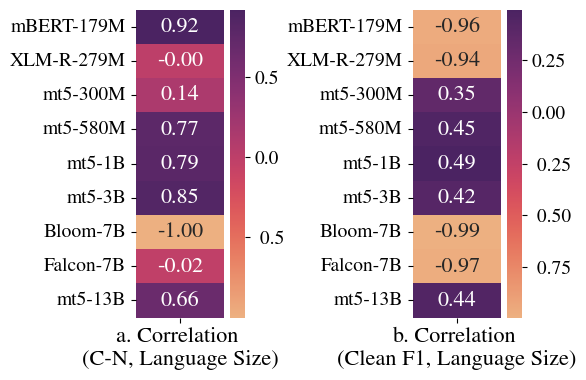

In [45]:
lang_cn=[]
lang_cl = []
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Provide the font's path manually

font_path = '/fonts/Times-Roman Regular.ttf'
# Create a font property object
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)

font_size = 16
# Set the font as the default font for all text elements in plots
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = font_size

import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(b_avg_wikiann['Model'])):
    model_name =b_avg_wikiann['Model'][i]
    mt5=best_res_wikiann[best_res_wikiann['Model']==model_name][['Language','C-N','Clean F1']]
    mt5['lang size'] = df_lang_size[model_name][mt5['Language']].values
    # res=mt5[['lang size','Avg C-N','Avg Clean']].corr()
    lang_cn.append(mt5[['lang size','C-N','Clean F1']].corr()['lang size']['C-N'])
    # print(lang_cn)
    lang_cl.append(mt5[['lang size','C-N','Clean F1']].corr()['lang size']['Clean F1'])

fig, axs = plt.subplots(1, 2, figsize=(5, 4))
labels = ['mBERT-179M', 'XLM-R-279M', 'mt5-300M', 'mt5-580M', 'mt5-1B', 'mt5-3B', 'Bloom-7B', 'Falcon-7B', 'mt5-13B']
# Create the heatmaps
# sns.heatmap(data1, ax=axs[0])
# sns.heatmap(data2, ax=axs[1])
df = pd.DataFrame([lang_cn], columns=labels, index=['a. Correlation \n(C-N, Language Size)'])
# plt.figure(figsize=(1.5, 5))

heatmap1 =sns.heatmap(df.T,  cmap="flare",fmt=".2f",annot=True, ax=axs[0])
axs[0].set_yticklabels(axs[0].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[0].set_xticklabels(axs[0].get_xticklabels(), size=font_size)
axs[0].set_ylabel('')
cbar1 = heatmap1.collections[0].colorbar

cbar1.ax.tick_params(labelsize=font_size-2)
print(df.values)
# plt.show()
# plt.figure(figsize=(1.5, 5))
# plt.figure(figsize=(1.5, 5))
df = pd.DataFrame([lang_cl], columns=labels, index=['b. Correlation \n(Clean F1, Language Size)'])
heatmap2 =sns.heatmap(df.T,  cmap="flare" ,fmt=".2f",annot=True, ax=axs[1])
axs[1].set_yticklabels(axs[1].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[1].set_xticklabels(axs[1].get_xticklabels(), size=font_size)
axs[1].set_ylabel('')
cbar1 = heatmap2.collections[0].colorbar
cbar1.ax.tick_params(labelsize=font_size-2)
plt.subplots_adjust(wspace=1.5)
plt.savefig('/wikiann_corr_lang.pdf',bbox_inches='tight')
# df.plot.bar()
print(df.values)
# df

KeyError: 'correlation (clean per, lang size)'

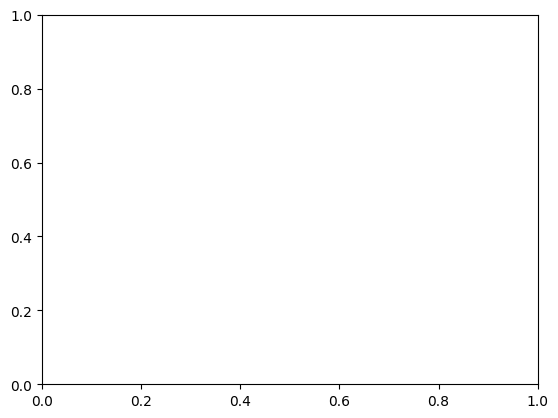

In [37]:
fig, ax = plt.subplots()
ax.barh(df.columns, df['correlation (clean per, lang size)'], color='g', label='Clean')
# ax.barh(df['Model'], , color='r', label='Noisy')

<Axes: >

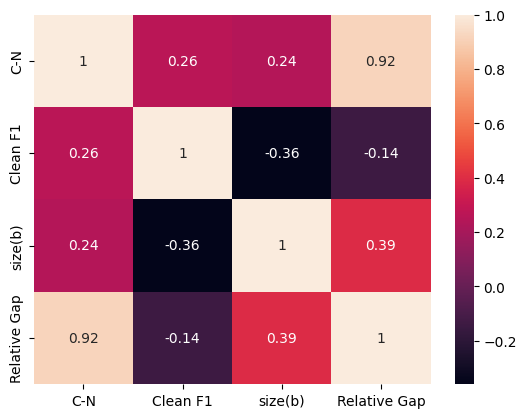

In [42]:
b_avg_wikiann['size(b)'] = [0.179,0.279,0.3,0.58,1,3,7,7,13]
sns.heatmap(b_avg_wikiann[['C-N','Clean F1','size(b)', 'Relative Gap']].corr(), annot=True)

## Average C-N and Relative Gap per model Wikiann

<Axes: xlabel='Model'>

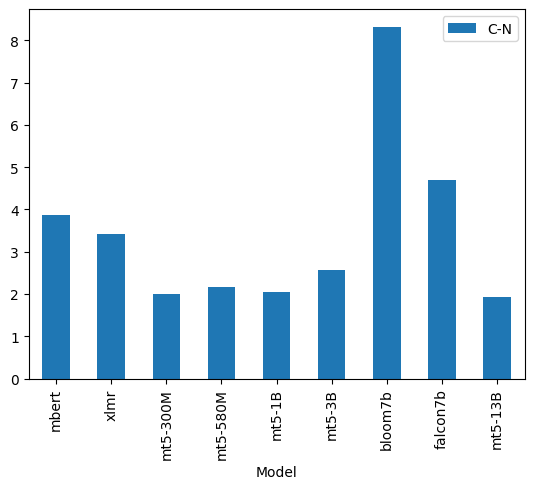

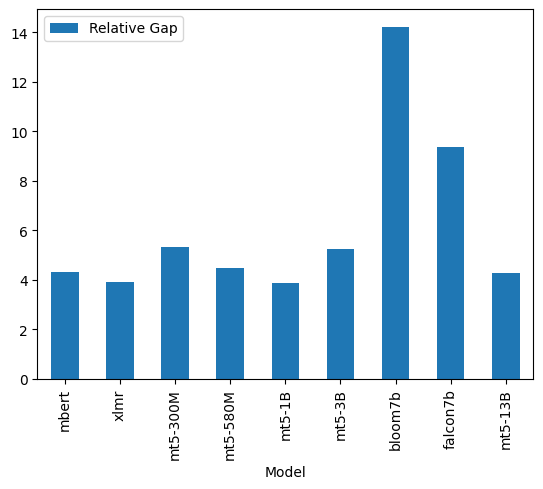

In [16]:
b_avg_wikiann.plot.bar(x = 'Model', y='C-N')
b_avg_wikiann.plot.bar(x = 'Model', y='Relative Gap')

## C-N and Relative Gap per Language for all models

In [41]:
mean_df = best_res_wikiann.groupby('Language')['C-N'].mean()
mean_df

Language
de    2.387500
en    3.655556
es    3.535556
fr    3.962222
tr    2.061429
Name: C-N, dtype: float64

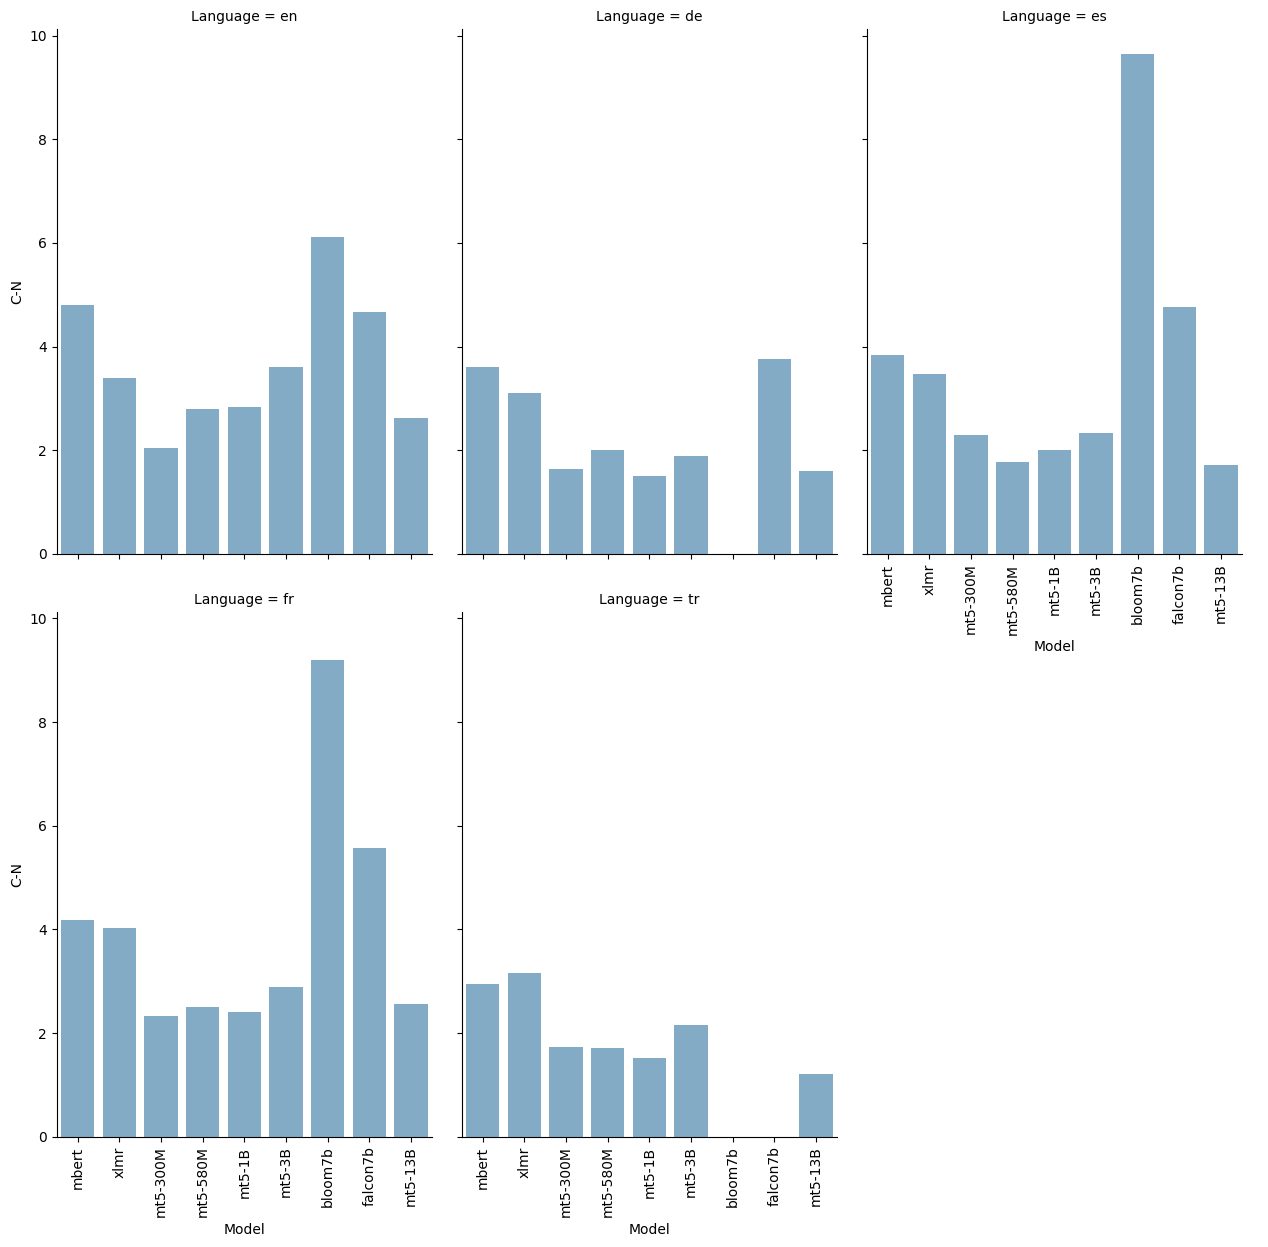

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
g = sns.catplot(
    data=best_res_wikiann, kind="bar",
    x="Model", y="C-N", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "C-N")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

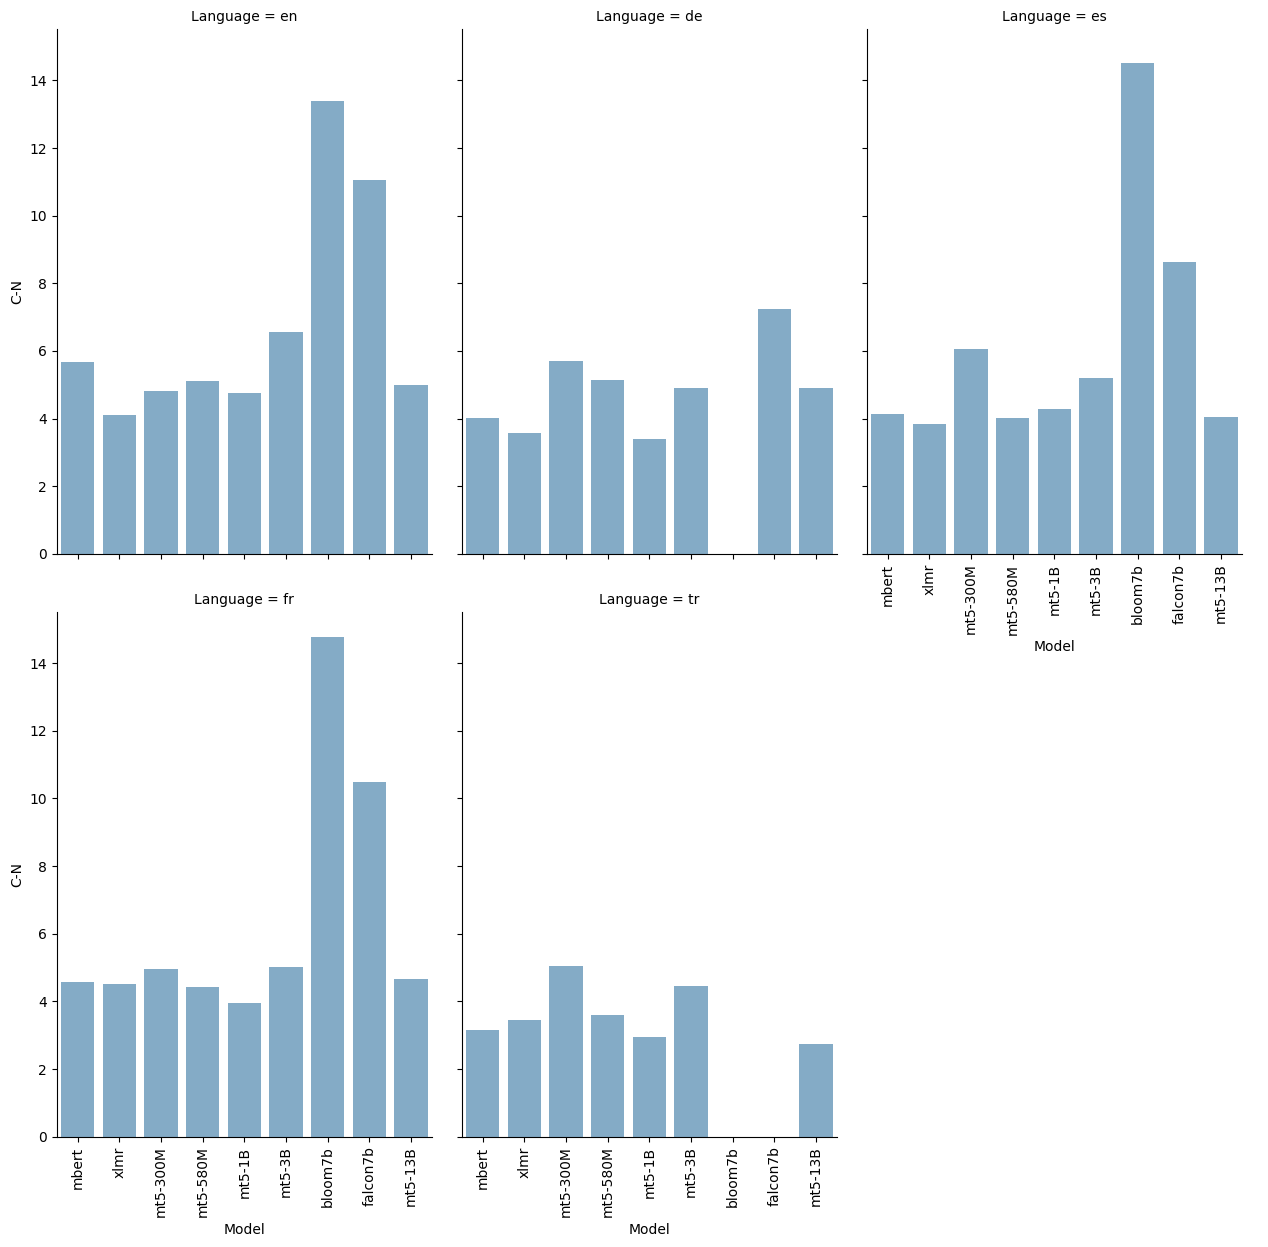

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
g = sns.catplot(
    data=best_res_wikiann, kind="bar",
    x="Model", y="Relative Gap", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "C-N")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()